# 0. General description
Code to plot raw behavior using Ricardo's script and to plotting the individual person's utility function. 


In [21]:
#Import the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os,sys



# 1. Input: 
- Patient's RAW data

- Parameters from the utility model

In [22]:
 #Specify where the data is stored in the FileShare. This is for my Laptop

#Path to the data files
patient_code = 'NIH117_R' #Specify the patient's code

#path= 'Z:/Santiago_Guardo/data' #Specify where the data is stored in the FileShare. This is for my Laptop
path = '/Volumes/UCDN/datasets/ICR' #MAC path to the File share
patient_split_dir = os.path.join(path,'split') 
patient_trials = os.path.join(patient_split_dir,'{}/crdm/{}_crdm.csv').format(patient_code,patient_code) #This is the psychopy output CSV

#Path to the utility model data
utility_dir = os.path.join(path,'utility')
utility_analysis = os.path.join(utility_dir,'split_CRDM_analysis.csv')
parameters = pd.read_csv(utility_analysis)

print('loading fn: {}'.format(patient_trials))
print('loading fn: {}'.format(utility_analysis))

#Declare the variables we are going to be using

trials = pd.read_csv(patient_trials)
p_options = trials['crdm_lott_p'].unique()/100
p_options = p_options[~np.isnan(p_options)]  # Remove nan values ~is a logical NOT operator
p_list = p_options.tolist()  # Do we want p_options to be an array or a list? Ask Ricardo 
p_options

loading fn: /Volumes/UCDN/datasets/ICR/split/NIH117_R/crdm/NIH117_R_crdm.csv
loading fn: /Volumes/UCDN/datasets/ICR/utility/split_CRDM_analysis.csv


array([0.75, 0.25, 0.13, 0.5 , 0.38])

In [23]:
#df from original trials output
df =  trials[['crdm_trial_type', 'crdm_domain','crdm_sure_amt', 'crdm_lott_bot', 'crdm_lott_top', 'crdm_lott_p', 'crdm_amb_lev', 'crdm_choice', 'crdm_choice2','crdm_lott','crdm_lott2']].copy()

#filtering out practice and Nan values
df = df.loc[df['crdm_trial_type'] != 'practice']
df = df[df['crdm_choice'].notna()]

#Adding the lotterys
df['value_reward'] = df['crdm_lott_bot'] +  df['crdm_lott_top']

#Dropping unneccesary columns
df = df.drop(columns=['crdm_trial_type','crdm_lott_bot','crdm_lott_top']).reset_index(drop=True)

#Organizing
column_order = ['crdm_sure_amt', 'crdm_domain', 'crdm_lott_p','value_reward', 'crdm_amb_lev', 'crdm_choice', 'crdm_choice2', 'crdm_lott', 'crdm_lott2']
df = df[column_order]
dfgains = df.loc[df['crdm_domain'] == 'gain']
dfloss = df.loc [df['crdm_domain'] == 'loss']

# 2. RAW behavior plots

In [24]:
#Defining count_tuples() function to return the unique items and their frequencies 
def count_tuples(listA):
  unique_items = list(set(listA))
  item_count = [listA.count(item) for item in unique_items]
  return unique_items,item_count

def tabulate_col(fn,df,col='crdm_sure_amt'):
    count_df = df[col].value_counts().sort_index()
    count_df = count_df.reset_index()
    print(count_df)
    #create .csv file with this info
    print("Saving to: {}".format(fn))
    count_df.to_csv(fn)

def count_lott_p_sure_amt_amb(fn_helper):
  df = pd.read_csv(fn_helper)
  #0's are now choosing immediate, 1 is choosing delay
  df['crdm_trial_resp.corr'] = 1.0 - df['crdm_trial_resp.corr']
  # get unique amounts that are "task" trials
  df = df.loc[df['crdm_trial_type'] == 'task']
  df['crdm_lott_amt'] = df['crdm_lott_top'] + df['crdm_lott_bot']

  for col in ['crdm_sure_amt','crdm_amb_lev','crdm_lott_p','crdm_lott_amt']:
    fn = os.path.join('csv','{}.csv'.format(col))
    tabulate_col(fn,df,col=col)

#Defining get_subject() function to just get the subject file name from the filepath
def get_subject(fn):
  subj = os.path.basename(fn).replace('_crdm.csv','')
  return subj

#Get sorted list of all participant data files, else notify error
split_dir = patient_split_dir
fn_helper = os.path.join(split_dir,patient_trials)
count_lott_p_sure_amt_amb(fn_helper)


    crdm_sure_amt  count
0           -29.0      7
1           -27.5      7
2           -27.0      7
3           -24.0      7
4           -21.5      6
5           -18.5      6
6           -14.0      6
7            -9.5      4
8             9.5      5
9            14.0      6
10           18.5      6
11           21.5     26
12           27.5      7
Saving to: csv/crdm_sure_amt.csv
   crdm_amb_lev  count
0           0.0     60
1          24.0     13
2          50.0     13
3          74.0     14
Saving to: csv/crdm_amb_lev.csv
   crdm_lott_p  count
0         13.0      9
1         25.0     12
2         38.0     12
3         50.0     53
4         75.0     14
Saving to: csv/crdm_lott_p.csv
    crdm_lott_amt  count
0           -85.5      1
1           -64.0      1
2           -63.0      1
3           -54.5      1
4           -50.0      2
5           -47.5      1
6           -45.5      1
7           -45.0      1
8           -44.5      1
9           -44.0      1
10          -42.0      1
11     

Use the results from above to define upper and lower bounds and ylabels and titles

/Volumes/UCDN/datasets/ICR/split/NIH117_R/crdm/NIH117_R_crdm.csv
Saving to: /Volumes/UCDN/datasets/ICR/utility/NIH117_R/crdm/NIH117_R_crdm_delay_amt_choice.csv


OSError: Cannot save file into a non-existent directory: '/Volumes/UCDN/datasets/ICR/utility/NIH117_R/crdm'

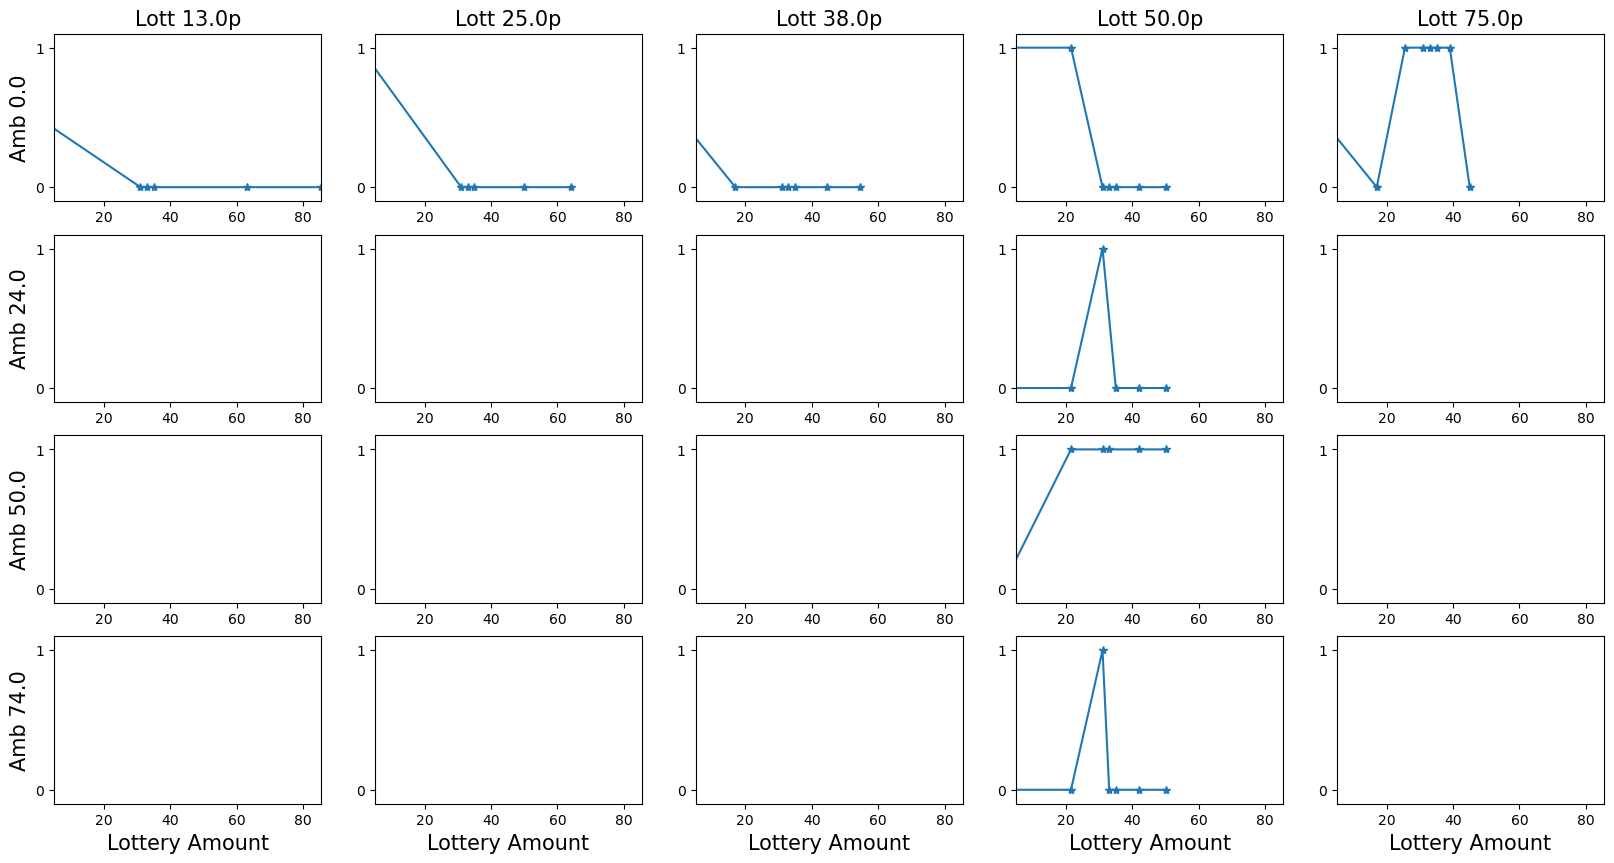

In [25]:
#Gains 

# split_dir defined above
#utility_dir defined at the beggining

#get set of all good data files for analysis
#good_files = sorted(glob(os.path.join(split_dir, 'NIH117_R/crdm/NIH117_R_crdm.csv')))  #Use if you want to look up a single person
good_files = sorted(glob(os.path.join(split_dir, '*/crdm/*_crdm.csv')))
if (not good_files):
  print("No good files available. Check file path.")
  sys.exit()

lott_p_lower_bound = [0,20,30,40,60]
lott_p_upper_bound = [20,30,40,60,80]
amb_lower_bound = [-1, 20, 40, 60]
amb_upper_bound = [20, 40, 60, 80]
ylabels = ['Amb 0.0','Amb 24.0', 'Amb 50.0', 'Amb 74.0']
titles = ['Lott 13.0p', 'Lott 25.0p','Lott 38.0p','Lott 50.0p','Lott 75.0p']

cols = ["lott_p", "amb_level", "sure_amt","lott_amt_choice", "frequency"]
lott_amt_choice_df = pd.DataFrame(columns=cols)

for i, subj_fn in enumerate(good_files):
  print(subj_fn)
  df = pd.read_csv(subj_fn)
  df['crdm_trial_resp.corr'] = 1.0 - df['crdm_trial_resp.corr']
  df['crdm_lott_amt'] = df['crdm_lott_top'] + df['crdm_lott_bot']
  df = df.loc[df['crdm_trial_type'] == 'task']

  plt.figure(i,figsize=(20,10))  

  #loop through each lottery-probability for each ambuiguity level
  for iimmed, (il,iu) in enumerate(zip(amb_lower_bound,amb_upper_bound)):
    for iplot,(lb,ub) in enumerate(zip(lott_p_lower_bound,lott_p_upper_bound)):
      index = 1+iplot+(5*iimmed)
      plt.subplot(4,5,index)
      x = []
      y = []
          
      idf = df.loc[(df['crdm_lott_p'] < ub) & (df['crdm_lott_p'] > lb) & (df['crdm_amb_lev'] < iu) & (df['crdm_amb_lev'] > il)]
      x = x + idf['crdm_lott_amt'].tolist()
      y = y + idf['crdm_trial_resp.corr'].tolist()
      
      lott_amt_choice, count = count_tuples(list(zip(x,y)))
      this_df = pd.DataFrame(columns=cols)
      this_df["frequency"] = count
      this_df["lott_amt_choice"] = lott_amt_choice
      this_df["lott_p"] = titles[iplot]
      this_df["amb_level"] = ylabels[iimmed]
      this_df["sure_amt"] = df['crdm_sure_amt'].unique()[0]
      lott_amt_choice_df = pd.concat([lott_amt_choice_df,this_df],ignore_index=True)


      if (not x):
        pass
      else:
        x,y = zip(*sorted(zip(x,y)))
      plt.plot(x,y,'*-')
      plt.ylim([-0.1,1.1])
      plt.xlim([5,df['crdm_lott_amt'].max()])
      plt.yticks([0, 1]) #Setting Y axis ticks to only 0 and 1
      if (iplot == 0):
        plt.ylabel(ylabels[iimmed],fontsize=15)
      if (iimmed == 0):
        plt.title(titles[iplot],fontsize=15)
      if (iimmed == 3):
        plt.xlabel("Lottery Amount",fontsize=15)
  
  subj = get_subject(subj_fn)

  fn = os.path.join(utility_dir,subj,'crdm/{}_crdm_delay_amt_choice.csv'.format(subj))
  print("Saving to: {}".format(fn))
  lott_amt_choice_df.to_csv(fn)
  print(lott_amt_choice_df)
  
  plt.suptitle("{} gains".format(subj), fontsize=25)
  fig_fn = os.path.join(utility_dir,subj,'crdm/{}_crdm_plot_delay_amt_choice_gain.png'.format(subj))
  print("Saving to: {}".format(fig_fn))
  plt.savefig(fig_fn)
  plt.show()

/Volumes/UCDN/datasets/ICR/split/NIH117_R/crdm/NIH117_R_crdm.csv
Saving to: /Volumes/UCDN/datasets/ICR/utility/NIH117_R/crdm/NIH117_R_crdm_delay_amt_choice.csv


OSError: Cannot save file into a non-existent directory: '/Volumes/UCDN/datasets/ICR/utility/NIH117_R/crdm'

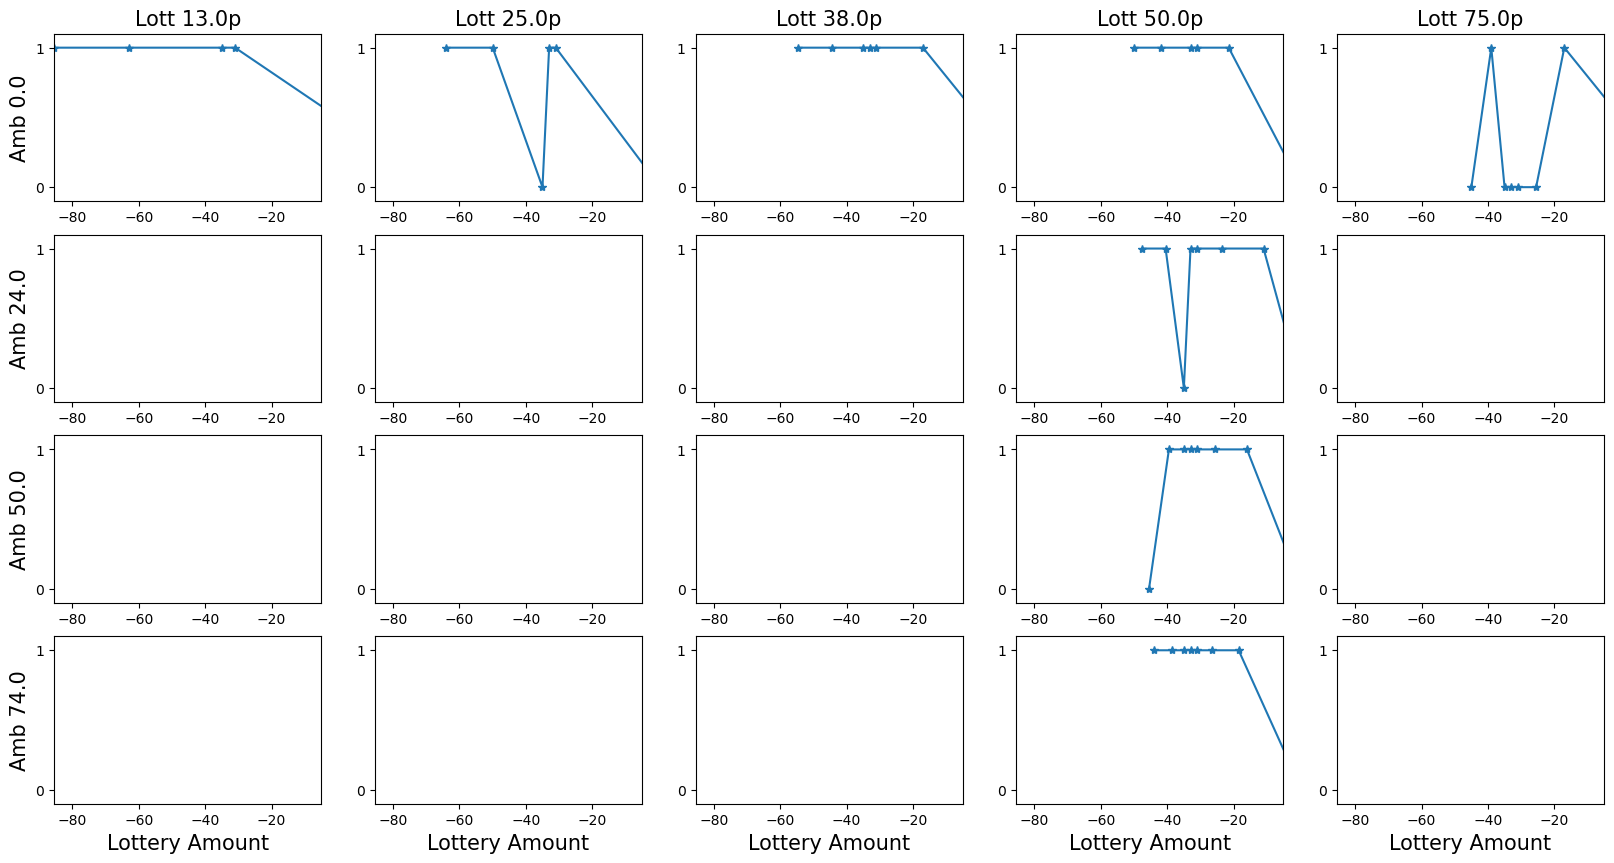

In [26]:
#losses 

# split_dir defined above
#utility_dir defined at the beggining
#get set of all good data files for analysis

#good_files = sorted(glob(os.path.join(split_dir, 'NIH117_R/crdm/NIH117_R_crdm.csv'))) #Use if you want to explore a single patient
good_files = sorted(glob(os.path.join(split_dir, '*/crdm/*_crdm.csv')))
if (not good_files):
  print("No good files available. Check file path.")
  sys.exit()

lott_p_lower_bound = [0,20,30,40,60]
lott_p_upper_bound = [20,30,40,60,80]
amb_lower_bound = [-1, 20, 40, 60]
amb_upper_bound = [20, 40, 60, 80]
ylabels = ['Amb 0.0','Amb 24.0', 'Amb 50.0', 'Amb 74.0']
titles = ['Lott 13.0p', 'Lott 25.0p','Lott 38.0p','Lott 50.0p','Lott 75.0p']

cols = ["lott_p", "amb_level", "sure_amt","lott_amt_choice", "frequency"]
lott_amt_choice_df = pd.DataFrame(columns=cols)

for i, subj_fn in enumerate(good_files):
  print(subj_fn)
  df = pd.read_csv(subj_fn)
  df['crdm_trial_resp.corr'] = 1.0 - df['crdm_trial_resp.corr']
  df['crdm_lott_amt'] = df['crdm_lott_top'] + df['crdm_lott_bot']
  df = df.loc[df['crdm_trial_type'] == 'task']

  plt.figure(i,figsize=(20,10))  

  #loop through each lottery-probability for each ambuiguity level
  for iimmed, (il,iu) in enumerate(zip(amb_lower_bound,amb_upper_bound)):
    for iplot,(lb,ub) in enumerate(zip(lott_p_lower_bound,lott_p_upper_bound)):
      index = 1 +iplot+(5*iimmed)
      plt.subplot(4,5,index)
      x = []
      y = []
          
      idf = df.loc[(df['crdm_lott_p'] < ub) & (df['crdm_lott_p'] > lb) & (df['crdm_amb_lev'] < iu) & (df['crdm_amb_lev'] > il)]
      x = x + idf['crdm_lott_amt'].tolist()
      y = y + idf['crdm_trial_resp.corr'].tolist()
      
      lott_amt_choice, count = count_tuples(list(zip(x,y)))
      this_df = pd.DataFrame(columns=cols)
      this_df["frequency"] = count
      this_df["lott_amt_choice"] = lott_amt_choice
      this_df["lott_p"] = titles[iplot]
      this_df["amb_level"] = ylabels[iimmed]
      this_df["sure_amt"] = df['crdm_sure_amt'].unique()[0]
      lott_amt_choice_df = pd.concat([lott_amt_choice_df,this_df],ignore_index=True)


      if (not x):
        pass
      else:
        x,y = zip(*sorted(zip(x,y)))
      plt.plot(x,y,'*-')
      plt.ylim([-0.1,1.1])
      plt.xlim([df['crdm_lott_amt'].min(),-5])
      plt.yticks([0, 1]) #Setting Y axis ticks to only 0 and 1
      if (iplot == 0):
        plt.ylabel(ylabels[iimmed],fontsize=15)
      if (iimmed == 0):
        plt.title(titles[iplot],fontsize=15)
      if (iimmed == 3):
        plt.xlabel("Lottery Amount",fontsize=15)
  
  subj = get_subject(subj_fn)

  fn = os.path.join(utility_dir,subj,'crdm/{}_crdm_delay_amt_choice.csv'.format(subj))
  print("Saving to: {}".format(fn))
  lott_amt_choice_df.to_csv(fn)
  print(lott_amt_choice_df)
  
  plt.suptitle("{} losses".format(subj), fontsize=25)
  fig_fn = os.path.join(utility_dir,subj,'crdm/{}_crdm_plot_delay_amt_choice_loss.png'.format(subj))
  print("Saving to: {}".format(fig_fn))
  plt.savefig(fig_fn)
  plt.show()

# 3. Model plots


In [ ]:
#This function plots the participant's input data for Gains

def calculate_sv_gains(alpha, beta,): #Define a function to plot SV given participant's input
    A = 0 
    p_options = [1.0, 0.87, 0.75, 0.62, 0.5, 0.38, 0.25, 0.13] #We want a line for every probability level. The 1.0 is the classic (non risky) utility function
    v = np.linspace(0, 50, 100) # The x axis goes from 0 to 50 an takes 100 points (just to make the figure smooth)
    
    plt.figure(figsize=(10, 6)) #Create a plot figure
    for p in p_options: #Iterate through each probability level
        sv = (p - beta * A / 2) * v**alpha #Calculate the SV of every V from 0 to 50 for a given p
        if p == 1.0:  #Non risky 
            plt.plot(v, sv, label=f'p = {p}', linestyle='--', color='black') #If p=0, plot a black dashed line using V as X and SV as Y
        else:
            plt.plot(v, sv, label=f'p = {p}')

    plt.xlabel('Value of Reward')
    plt.ylabel('SV')
    plt.title("Participant's SV model for Gains")
    plt.legend()
    plt.grid(True)
    plt.show()

def calculate_sv_losses(alpha_loss, beta_loss,): #Define a function to plot SV given participant's input
    A = 0 
    p_options = [1.0, 0.87, 0.75, 0.62, 0.5, 0.38, 0.25, 0.13] #We want a line for every probability level. The 1.0 is the classic (non risky) utility function
    v = np.linspace(0, -50, 100) # The x axis goes from 0 to 50 an takes 100 points (just to make the figure smooth)
    
    plt.figure(figsize=(10, 6)) #Create a plot figure
    for p in p_options: #Iterate through each probability level
        sv = (p - beta_loss * A / 2)* -abs(v)**alpha_loss #Calculate the SV of every V from 0 to 50 for a given p
        if p == 1.0:  #Non risky 
            plt.plot(v, sv, label=f'p = {p}', linestyle='--', color='black') #If p=0, plot a black dashed line using V as X and SV as Y
        else:
            plt.plot(v, sv, label=f'p = {p}')

    plt.xlabel('Value of Reward')
    plt.ylabel('SV')
    plt.title("Participant's SV model for Losses")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
calculate_sv_gains(alpha_pos, beta_pos)

In [ ]:
calculate_sv_losses(alpha_neg, beta_neg)